In [1]:
# SFSW方法的表示部分，不同的精度下结果存储在 output/SAP/SAP_SFSW.txt中

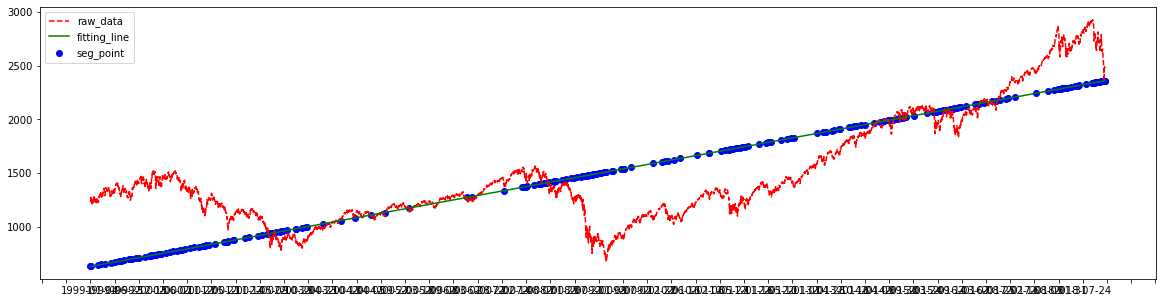

the SFSW mean square fitting error1:  432682.5482928019
the SFSW vertical fitting error2:  28973.630798445432
Running time: 2.1494001999999455 Seconds


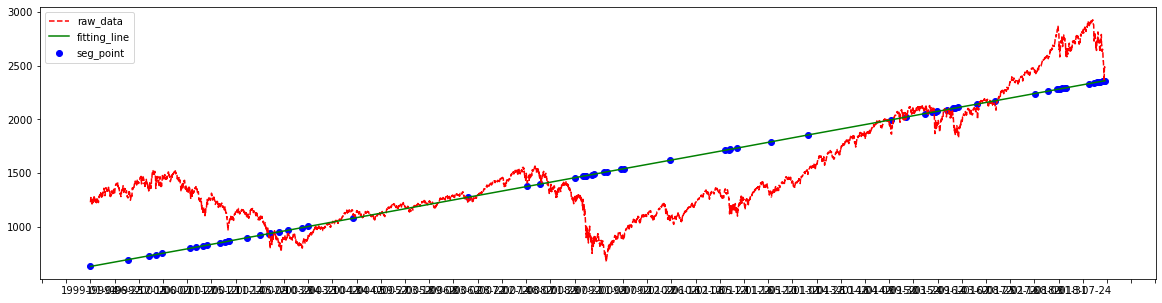

the SFSW mean square fitting error1:  90.76281252007169
the SFSW vertical fitting error2:  547.0153710709751
Running time: 1.9095405000002756 Seconds


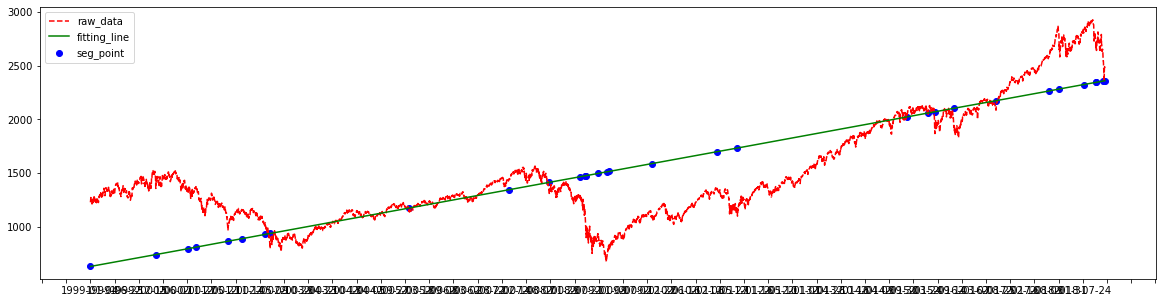

the SFSW mean square fitting error1:  101.24243442763654
the SFSW vertical fitting error2:  568.1077369066368
Running time: 1.8155449999999291 Seconds


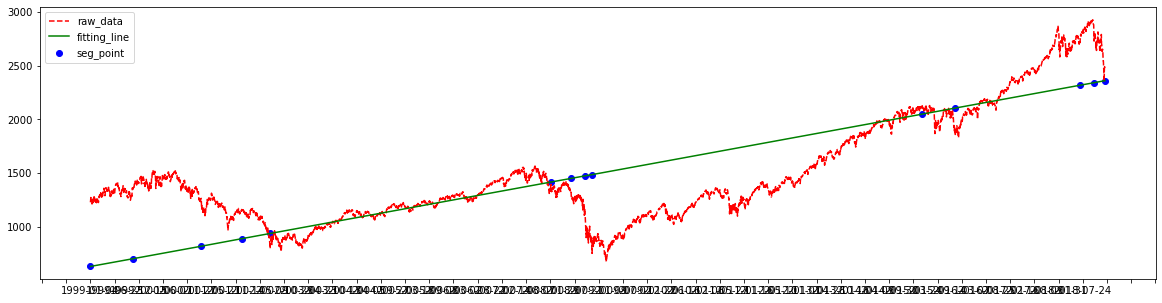

the SFSW mean square fitting error1:  238.14533497677948
the SFSW vertical fitting error2:  912.0467756479004
Running time: 1.5207642999998825 Seconds


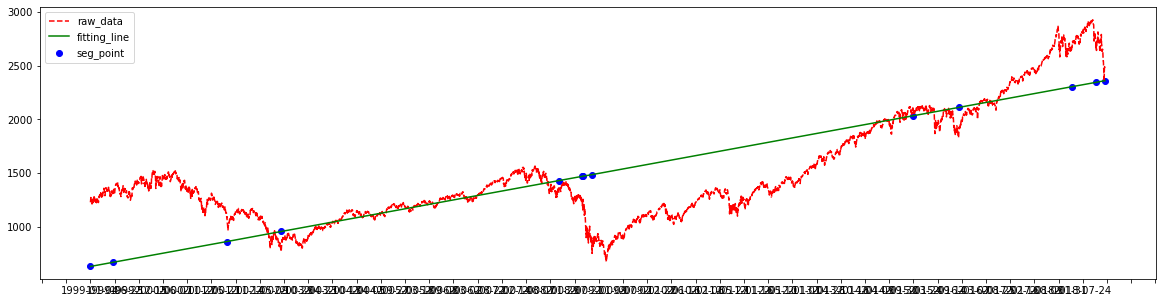

the SFSW mean square fitting error1:  370.8829151013624
the SFSW vertical fitting error2:  1163.6862403887153
Running time: 1.5761481999998068 Seconds


In [2]:
# -*- coding: utf-8 -*-
"""
Created on Sat Jun 20 10:32:51 2020

@author: Jacky

Algorithm 3.3 Stepwise FSW Segmentation Algorithm(SFSW)

Input: time sequence(a1,a2,...,an,...), max_error threshold

Output: segmenting points(s1,s2,...sk,...) 

Initial: i = 1 ,index = 1, s1 = a1

While not finished segmenting time series:
    index = index + 1
    [af,aj] = Swf(i)
    a_b = Swb(j)
    o = Arg Min_(b<=k<=f) {Sre[S(ai,...,ak) + S(ak,...,aj)]}
    S_index = a_o
    i = o
    

"""
import methods as md
import numpy as np
import matplotlib.pyplot as plt
import time
import matplotlib.ticker as ticker


def FSW(y, max_error,X):
    i = 0
    seg_no = 0
    csp_id = 0 #seg_no为分段点，csp_id为
    segList = []
    segList.append(X[0]) #初始化第一个分段点,加入到列表中存储
    lowl = -9999
    upl = 9999#定义直线斜率参数
    while i<len(y) - 1: #如果还没有完成时间序列分段
        i += 1
        #upl = min(upl,l(s_seg_no),up(ai))
        upl = min(upl,((y[X.index(segList[seg_no])]-(y[i] + max_error))/(segList[seg_no] - X[i])))
        lowl = max(lowl,((y[X.index(segList[seg_no])]-(y[i] - max_error))/(segList[seg_no] - X[i])))
        #如果upl 和 lowl同时小于0的情况下，如upl = -1 , lowl = -5,此时满足upl在Lowl上，需要取abs
        if upl < lowl: #若当前时序点加入后最小上界误差 小于 最大下届误差
            seg_no += 1
            #segList[seg_no] = y[csp_id] #最远候选分段点是一个新的分段点
            segList.append(X[csp_id])
            i = csp_id
            lowl = -9999
            upl = 9999 #重置变量
        else:
            if lowl<=((y[X.index(segList[seg_no])]-(y[i] + max_error))/(segList[seg_no] - X[i])) and ((y[X.index(segList[seg_no])]-(y[i] + max_error))/(segList[seg_no] - X[i])) <= upl:
                csp_id = i #记录最远csp 候选分段点的id
    segList.append(X[-1])
    return segList


#--------------------参数说明--------------------
#Ts原始时间序列  max_error最大误差   X 时间序列时间戳  point_ai分段起始点       
def getSplit_point(TS, max_error,X,point_ai,point_ab,point_af):
    k = TS.index(point_ab) #确定起点索引
    while (k < X.index(point_af) - 1) and (k >= TS.index(point_ab)):
        #
        #插值直线系数的计算从点k开始，计算插值直线与各点之间的MVD
        sum_error = 0
        #a = (TS[k] - point_ai)/(X[k]-X[TS.index(point_ai)])
        a = (TS[k] - point_ai)/(X[k]-X[X.index(point_ai)])
        b = TS[k] - a * X[k]
        #i = TS.index(point_ai)
        i = X.index(point_ai)
        while (i < k):
# =============================================================================
#         for i in range(k-TS.index(point_ai)):
#             sum_error += abs(TS[i] - (a*X[i] + b))
# =============================================================================
            sum_error += abs(TS[i] - (a*X[i] + b))
            k += 1
        if(sum_error<=max_error):
            return X[k]
        else:
            return point_af
    #如果在a_b 和 a_f点之间找不到点o，则直接返回af点作为分段点，保持原来的分段
# =============================================================================
#     return y.tolist().index(point_af)
# =============================================================================
    
#--------------------参数说明--------------------
#此函数是寻找从分段点a_f向后（分段点a_i）找到新的满足误差要求的分段Sb1：{a_b,...,a_j}
def Swb(TS,af_index,j,max_error,X,segList,af,ai_index):
    lowl = -9999
    upl = 9999#定义直线斜率参数
    index = af_index
    while upl > lowl and index > ai_index:
        #segList.append(TS[j])
        upl = min(upl,((TS[index]-(TS[j] + max_error))/(X[index] - X[j])))
        lowl = max(lowl,((TS[index]-(TS[j] - max_error))/(X[index] - X[j])))
        index -= 1  
    if index <= af_index and index >= 0:
        return index #返回找到的分段点a_b
    
    else:
        return None
    

def SFSW(y,max_error,X):
    y = y.tolist()
    i = 1
    index = 0
    segList = []
    #此处得到的segList是否需要tolist()
    segList = FSW(y,max_error,X) #将FSW方法得到的分段点加入到SegList中
    while i < len(segList) - 1:
        index += 1
        #i从1开始，segList[1]就是分段点a_f segList[2]就是分段点a_j
        ai = segList[i-1]
        af = segList[i]
        aj = segList[i+1]
        #Swb函数是从aj向后分段数据点并返回向后分段点a_b的函数
        a_b = Swb(y,X.index(af),X.index(aj),max_error,X,segList,af,X.index(ai))
        #然后在a_b和a_f之间找到一个点o作为新的S1分段
        if a_b != None:
            #在a_b和a_f之间找到分段点a_o
            o = getSplit_point(y,max_error,X,segList[i],y[a_b],af)
            if o not in segList and o!=None:    
                #segList.insert(X[index],o)
                segList.insert(index,o)
                i = i + 1
            else:
                i = i + 1
        else: #找不到点a_b，则直接从下个点开始
            i += 1
    return segList



if __name__=='__main__':
    #TS = md.loadDataSet(r'C:\Users\Administrator\Desktop\论文\神经网络\美国标准普尔500指数历史数据(1990-2019).csv')
    #TS_x = md.loadDataSet(r'C:\Users\Administrator\Desktop\论文\神经网络\美国标准普尔500指数历史数据(1990-2019).csv')
    TS = md.loadDataSet(r'SAP.csv',encoding='utf-8')
    TS = TS.dropna()
    TS_x = md.loadDataSet(r'SAP.csv',encoding='utf-8')
    TS_x = TS_x.dropna()
    ts = np.array(TS_x['Close'])
    ts = ts.tolist()
    ts_x = np.array(TS_x['Date'])
    TS_x = np.array(TS_x['Date'])
    TS_x = md.time_translate(TS_x)
    std_TS_x = np.std(TS_x)#时间序列的原始数据方差
    mean_TS_x = np.mean(TS_x)#时间序列的原始数据均值
    x = (TS_x - mean_TS_x)/std_TS_x #将时间戳x做标准化处理，便于传参进行后续计算
    x = x.tolist()
    TS_1 = np.array(TS['Close'])
    std_TS_1 = np.std(TS_1)#收盘价的原始数据方法
    mean_TS_1 = np.mean(TS_1)#收盘价的原始数据均值
    y = (TS_1 - mean_TS_1)/std_TS_1
    #max_error = 0.1 * (max(y) - min(x))
    max_error = 0.1
    segList_SFSW = [] #为SFSW方法获取到的分段点
    
    #定义要存入文件中的结果列表
    list_error = [] #统计误差
    list_segNum=[] #统计分段数
    list_time = [] #运行时间
    list_ans = []
    while(max_error <=0.5):
        #start =time.clock()
        start = time.perf_counter()
        segList_SFSW = SFSW(y,max_error,x)
        segList_SFSW_1 = []
        for i in range(len(x)):
            if (x[i] in segList_SFSW):
                segList_SFSW_1.append(x[i])
        x1 = []
        y1 = []
        for i in range(len(segList_SFSW_1)):
            x1.append(segList_SFSW_1[i])
            #y1.append(segList_SFSW_1[i])
            y1.append(y[x.index(segList_SFSW_1[i])])
        
        time_temp=[]
        for i in range(len(segList_SFSW_1)):
            if segList_SFSW_1[i] not in time_temp:
                time_temp.append(ts_x[x.index(segList_SFSW_1[i])])
        
        #复原时间序列
        for i in range(len(segList_SFSW_1)):
           segList_SFSW_1[i] = segList_SFSW_1[i] * std_TS_1 + mean_TS_1
        ans_seg_point_date=time_temp
        segList_SFSW = segList_SFSW_1
    
        fig = plt.figure(figsize=(20, 5))
        ax = fig.add_subplot(111)
        ax.plot(ts_x,ts,'r--',label='raw_data')
        ax.scatter(ans_seg_point_date,segList_SFSW,color='blue',label='seg_point')
        ax.plot(ans_seg_point_date,segList_SFSW,color='green',label='fitting_line')
        tick_spacing = 120
        ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing ))
        ax.legend()
        plt.show()
           
        error = md.calculate_fitting_error(x1,y1,y,x)
        error2 = md.calculate_vertical_error(x1,y1,y,x)
        print("the SFSW mean square fitting error1: ",error)
        print("the SFSW vertical fitting error2: ",error2)
        #end = time.clock()
        end = time.perf_counter()
        print('Running time: %s Seconds'%(end-start))
        
         #将得到结果存入结果列表中
        list_error.append(error2)
        list_segNum.append(len(segList_SFSW))
        list_time.append(end-start)
        max_error += 0.1
    list_ans.append(list_error)
    list_ans.append(list_segNum)
    list_ans.append(list_time)
    np.savetxt('output/SAP/SAP_SFSW.txt',list_ans,fmt='%.4f')  